In [1]:
import docx2txt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

%matplotlib inline

import re
from calendar import month_name
from nltk.corpus import stopwords

from PyPDF2 import PdfReader

In [11]:
# Input filename along with path here
fileNamePath = "/Users/midhunthaduru/Desktop/Job Applications/Resume - Midhun Thaduru - Technology.docx"

In [12]:
try:
    # Extract text from .pdf file
    if fileNamePath.endswith(".pdf"):
        # creating a pdf reader object
        reader = PdfReader(fileNamePath)
        
        # printing number of pages in pdf file
        print(len(reader.pages))
        
        # getting a specific page from the pdf file
        page = reader.pages[0]
        
        # extracting text from page
        text = page.extract_text()

    elif fileNamePath.endswith(".docx"):
        text = docx2txt.process(fileNamePath)

    else:
        print("Unrecognizable file format")
except:
    print("Cannot process input format, please use .pdf or .docx format only")

print(text)

MIDHUN THADURU

	Dallas, Texas, 75082; +1 (945) 249-2614; midhun.thaduru@utdallas.edu; https://www.linkedin.com/in/tmidhun/

	

EDUCATION EXPERIENCE

	The University of Texas at Dallas	August 2023

	Master of Science, Business Analytics; Minor in Data Science	GPA 3.87

	Birla Institute of Technology & Science, Pilani	June 2013

	Bachelor of Pharmacy (Honors)	

	

TECHNICAL SKILLS

Certifications:

AWS Certified Cloud Practitioner

Analysis Tools:

AWS, GCP, Airflow, Tableau, Metabase, Grafana, Git, Linux

Databases:

Athena, BigQuery, MySQL

Programming:

Python, R, SQL, PySpark

Software:

VS Code, R Studio, SAS, EXCEL

Operating Systems:

Linux, MacOS, Windows



PROFESSIONAL EXPERIENCE

	BukuWarung India Pvt Ltd, Remote	April 2021 – July 2022

	Data Scientist

Built OCR flask API using AWS Textract to extract bank transactions from PDF with 94% accuracy for credit scoring

Classified businesses with 78% accuracy that helped Ops provide customized services to B2B merchants



	Wicked

In [13]:
type(text)

str

As we can see, the text output is string object. Now, we will clean up the string by removing URLs, Stopwords, numbers, special characters, etc.

In [14]:
# Remove URLs from the string
text = re.sub(r'http\S+', '', text)

# Remove mail addresses from the string
text = re.sub(r'\S*@\S*\s?', '', text)

# Remove non-textual data from the string
text = re.sub('[^a-zA-Z \n\.]', '', text)

# creating pattern for months and removing months from the text
str_pattern = ''
for i in month_name[1:]:
    str_pattern = str_pattern + i + '|'

str_pattern = re.sub('\|$', '', str_pattern)

text = re.sub(pattern=str_pattern, repl='', string=text)

# Remove general stop words from text
text = ' '.join([word for word in text.split() if word not in STOPWORDS])

print(text)

MIDHUN THADURU Dallas Texas EDUCATION EXPERIENCE The University Texas Dallas Master Science Business Analytics Minor Data ScienceGPA . Birla Institute Technology Science Pilani Bachelor Pharmacy Honors TECHNICAL SKILLS Certifications AWS Certified Cloud Practitioner Analysis Tools AWS GCP Airflow Tableau Metabase Grafana Git Linux Databases Athena BigQuery MySQL Programming Python R SQL PySpark Software VS Code R Studio SAS EXCEL Operating Systems Linux MacOS Windows PROFESSIONAL EXPERIENCE BukuWarung India Pvt Ltd Remote Data Scientist Built OCR flask API using AWS Textract extract bank transactions PDF accuracy credit scoring Classified businesses accuracy helped Ops provide customized services BB merchants Wicked Ride Adventures Pvt Ltd Bangalore Data Science Lead EV Retrofit Vehicles Saved AB testing firmware update electric twowheelers Reduced TAT identifying battery swapping stations using clustering algorithms Ather Energy Pvt Ltd Bangalore Senior Data Analyst Vehicle Intelligen

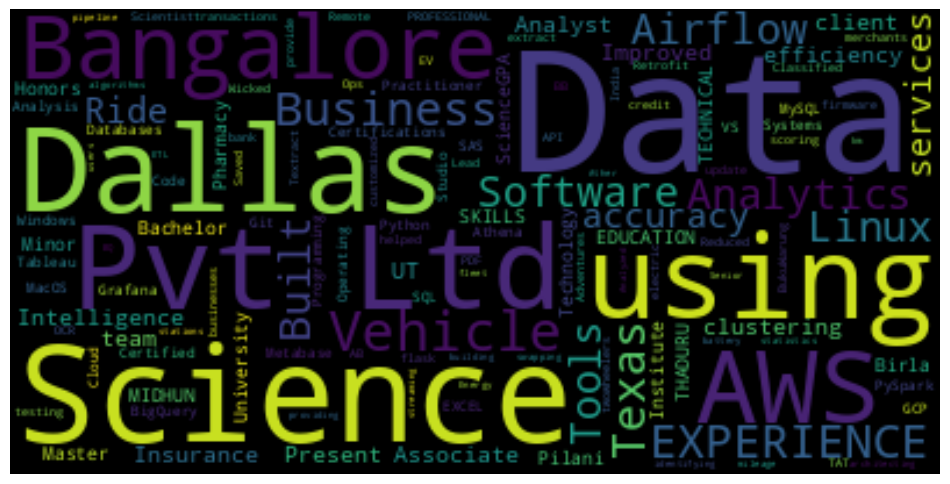

In [15]:
# Create the word cloud object
wordcloud = WordCloud().generate(text)

# Display the generated image
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()